In [2]:
import numpy as np
from modules.KinTool import KinTool, LorentzVector, LorentzVector2
import matplotlib as mpl
import matplotlib.pyplot as plt
from ROOT import Math


Welcome to JupyROOT 6.24/04


In [3]:

data = np.load("data/raw/X.npy")
feature_names = ['Q2', 'W', 'Gamnu', 'Xbj', 'y', 't', 'phih', 
                'electron px', 'photon px', 'proton px', 
                'electron py', 'photon py', 'proton py', 
                'electron pz', 'photon pz', 'proton pz', 
                'electron E',  'photon E',  'proton E']
mpro, mele, mpho = 0.9382720813, 0.0005109989461, 1e-16
ebeam = LorentzVector(mele, 0, 0, -np.sqrt(5**2 - mele**2))
nbeam = LorentzVector(mpro, 0, 0, 275)
KT = KinTool()


In [4]:
nbeam @ nbeam

0.8803544985421468

In [4]:

real = np.zeros((data.shape[0], 12))
calc = np.zeros((data.shape[0], 12))
errs = np.zeros((data.shape[0], 12))

real_eles = np.zeros((data.shape[0], 5))
real_phos = np.zeros((data.shape[0], 5))
real_pros = np.zeros((data.shape[0], 5))

calc_eles = np.zeros((data.shape[0], 5))
calc_phos = np.zeros((data.shape[0], 5))
calc_pros = np.zeros((data.shape[0], 5))

for i, d in enumerate(data):
    if i % 100000 == 0:
        print(i)
    # ele = LorentzVector(mele, d[7], d[10], d[13])
    # pho = LorentzVector(mpho, d[8], d[11], d[14])
    # pro = LorentzVector(mpro, d[9], d[12], d[15])

    ele = LorentzVector(d[16], d[7], d[10], d[13], kind='e')
    # pho = LorentzVector(d[17], d[8], d[11], d[14], kind='e')
    pro = LorentzVector(d[18], d[9], d[12], d[15], kind='e')
    pho = ebeam + nbeam - (ele + pro)
    # pho = ebeam - (ele)

    
    # ele2 = LorentzVector(d[16], d[7], d[10], d[13], kind='e')
    # pho2 = LorentzVector(d[17], d[8], d[11], d[14], kind='e')
    # pro2 = LorentzVector(d[18], d[9], d[12], d[15], kind='e')
    ele2 = Math.PxPyPzEVector(d[7], d[10], d[13], d[16])
    pho2 = Math.PxPyPzEVector(d[8], d[11], d[14], d[17])
    pro2 = Math.PxPyPzEVector(d[9], d[12], d[15], d[18])
    

    real[i, :] = np.array([d[16],   d[17], d[18], 
                            ele2.mass(), pho2.mass(), pro2.mass(),#mele, mpho, mpro,
                            d[0], d[1], d[2], d[3], d[4], d[5] ])
    # real[i, :] = np.array([ele2.E(), pho2.E(), pro2.E(), 
    #                         ele2.mass(), pho2.mass(), pro2.mass(), 
    #                         KT.Q2(ebeam,ele2), KT.W(ebeam,nbeam,ele2), 
    #                         KT.Nu(ebeam,nbeam,ele2), KT.xBj(ebeam,nbeam,ele2), 
    #                         KT.Y(ebeam,nbeam,ele2), KT.MinusT(nbeam,pro2) ])

    calc[i, :] = np.array([ele.E(), pho.E(), pro.E(), 
                            ele.mass(), pho.mass(), pro.mass(), 
                            KT.Q2(ebeam,ele), KT.W(ebeam,nbeam,ele), 
                            KT.Nu(ebeam,nbeam,ele), KT.xBj(ebeam,nbeam,ele), 
                            KT.Y(ebeam,nbeam,ele), KT.MinusT(nbeam,pro) ])

    real_eles[i,:] = np.append([ele2.mass()], [ele2.E(), ele2.Px(), ele2.Py(), ele2.Pz()])#ele2.lv)
    real_phos[i,:] = np.append([pho2.mass()], [pho2.E(), pho2.Px(), pho2.Py(), pho2.Pz()])#pho2.lv)
    real_pros[i,:] = np.append([pro2.mass()], [pro2.E(), pro2.Px(), pro2.Py(), pro2.Pz()])#pro2.lv)

    calc_eles[i,:] = np.append([ele.mass()], ele.lv)
    calc_phos[i,:] = np.append([pho.mass()], pho.lv)
    calc_pros[i,:] = np.append([pro.mass()], pro.lv)


0


IndexError: index 16 is out of bounds for axis 0 with size 7

In [ ]:
print(calc_eles[:10,1:])

[[ 1.15254533 -0.26210815  1.08992267 -0.26782238]
 [ 1.06744194 -0.21442674  0.89164937 -0.54627365]
 [ 0.95091885 -0.1886241   0.78435445 -0.5034439 ]
 [ 0.93337029 -0.21372712  0.88874012 -0.18879047]
 [ 0.98899454  0.60429025  0.57080948 -0.5358358 ]
 [ 1.98561585  1.3964113   0.48670763 -1.32507408]
 [ 1.581532    1.00426197 -0.83389437 -0.89292854]
 [ 0.93639654 -0.2162922   0.89940649 -0.14534143]
 [ 0.78403431 -0.16056369  0.66767097 -0.37834451]
 [ 1.38922155 -0.10324908  0.984698   -0.97449774]]


In [ ]:
elvs = LorentzVector2(data[:,16],data[:,7],data[:,10],data[:,13],kind='e')
print(elvs)
print(elvs.mass())

[[ 1.1525453   1.0674419   0.95091885 ... -0.13001473 -0.7484467
  -0.19717999]]


In [ ]:
np.array([data[:,16],data[:,7],data[:,10],data[:,13]]).reshape()

array([ 1.1525453 ,  1.0674419 ,  0.95091885, ..., -0.13001473,
       -0.7484467 , -0.19717999], dtype=float32)

In [ ]:
elv0 = LorentzVector(data[0,16],data[0,7],data[0,10],data[0,13],kind='e')
elv0.mass()

-0.0004304266006920917

In [ ]:
# KT.Q2()
ebeam2 = LorentzVector2(mele, 0, 0, -5)
print(ebeam2.lv)
# print(ebeam2.mass2())
# np.array([np.array(1), np.array(2), np.array(3), np.array(4)])
np.array([1, 2, 3, 4]).reshape(1,-1)

[[ 5.00000003  0.          0.         -5.        ]]


array([[1, 2, 3, 4]])

In [ ]:
# print(ebeam)
# print(mele**2, ebeam.mass2())
# print(mele, ebeam.mass(), "\n")

# print(nbeam)
# print(mpro**2, nbeam.mass2())
# print(mpro, nbeam.mass(), "\n")

# print(ele)
# print(ele2.mass2(), ele.mass2())
# print(ele2.mass(), ele.mass(), "\n")

# print(pho)
# print(pho2.mass2(), pho.mass2())
# print(pho2.mass(), pho.mass(), "\n")

# print(pro)
# print(pro2.mass2(), pro.mass2())
# print(pro2.mass(), pro.mass(), "\n")

In [ ]:
errs = ( calc - real ) / real * 100
mins = np.min(errs, axis=0)
maxs = np.max(errs, axis=0)
mm = np.mean(errs, axis=0)
ss = np.std(errs, axis=0)
nn = ["ele E","pho E","pro E","ele M","pho M","pro M","Q2","W","Nu","xB","y","t"]

/tmp/ipykernel_80668/16155528.py:1: RuntimeWarning: invalid value encountered in true_divide
  errs = ( calc - real ) / real * 100


-: ave% std%, max% min%
ele E: nan% nan%, nan% nan%
pho E: nan% nan%, nan% nan%
pro E: nan% nan%, nan% nan%
ele M: nan% nan%, nan% nan%
pho M: nan% nan%, nan% nan%
pro M: nan% nan%, nan% nan%
Q2: nan% nan%, nan% nan%
W: nan% nan%, nan% nan%
Nu: nan% nan%, nan% nan%
xB: nan% nan%, nan% nan%
y: nan% nan%, nan% nan%
t: nan% nan%, nan% nan%


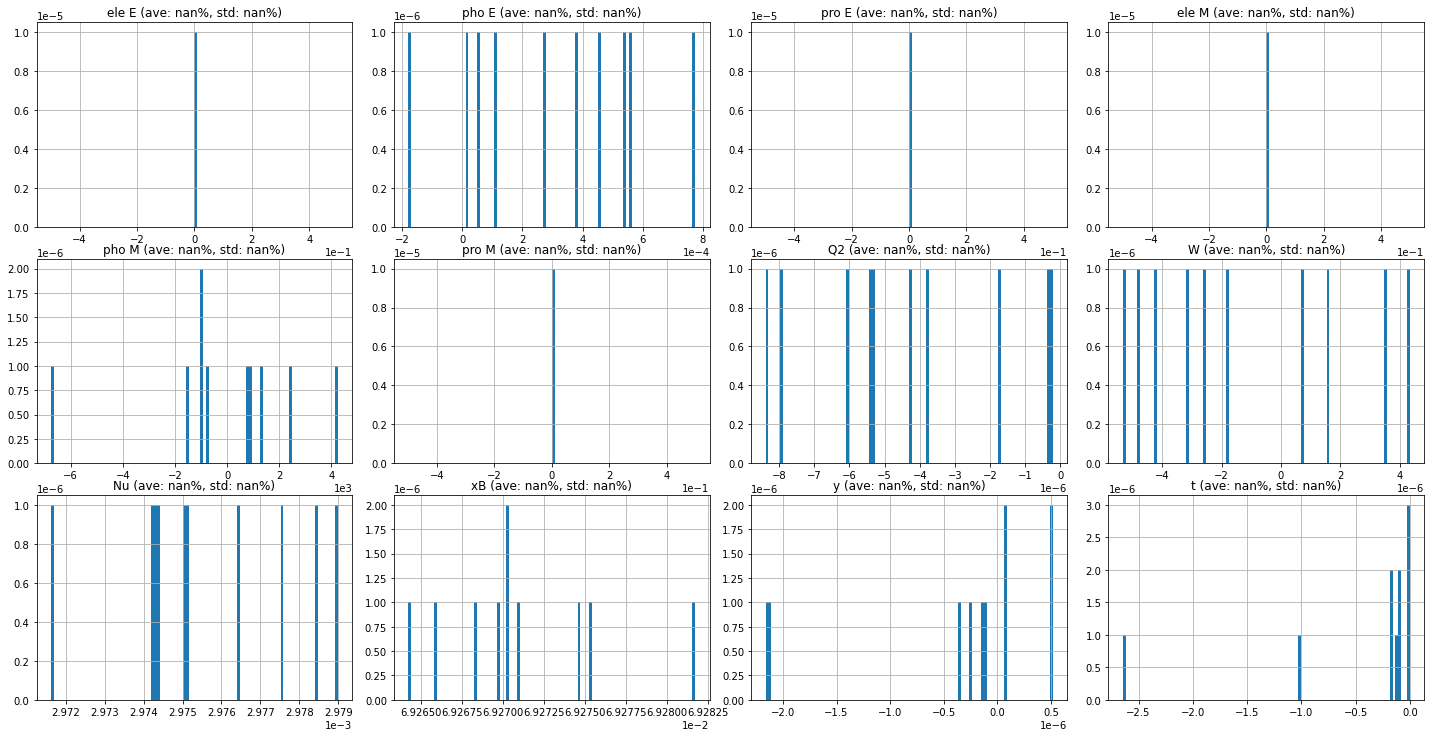

In [ ]:
f, axs = plt.subplots(3,4, figsize=(20,10)); f.tight_layout()
axs = axs.flatten()
print(f"-: ave% std%, max% min%")
for ax, err, mn, mx, m, s, n in zip(axs, errs.T, mins, maxs, mm, ss, nn):
    print(f"{n}: {m:.6f}% {s:.6f}%, {mn:.6f}% {mx:.6f}%")
    ax.hist(err, bins=100, weights=np.ones_like(err)/len(err))
    ax.set_title(f"{n} (ave: {m:.3}%, std: {s:.3}%)")
    # ax.set_xlabel("% error")
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax.grid()

f.savefig("imgs/perc_error_kintool.png", bbox_inches="tight")

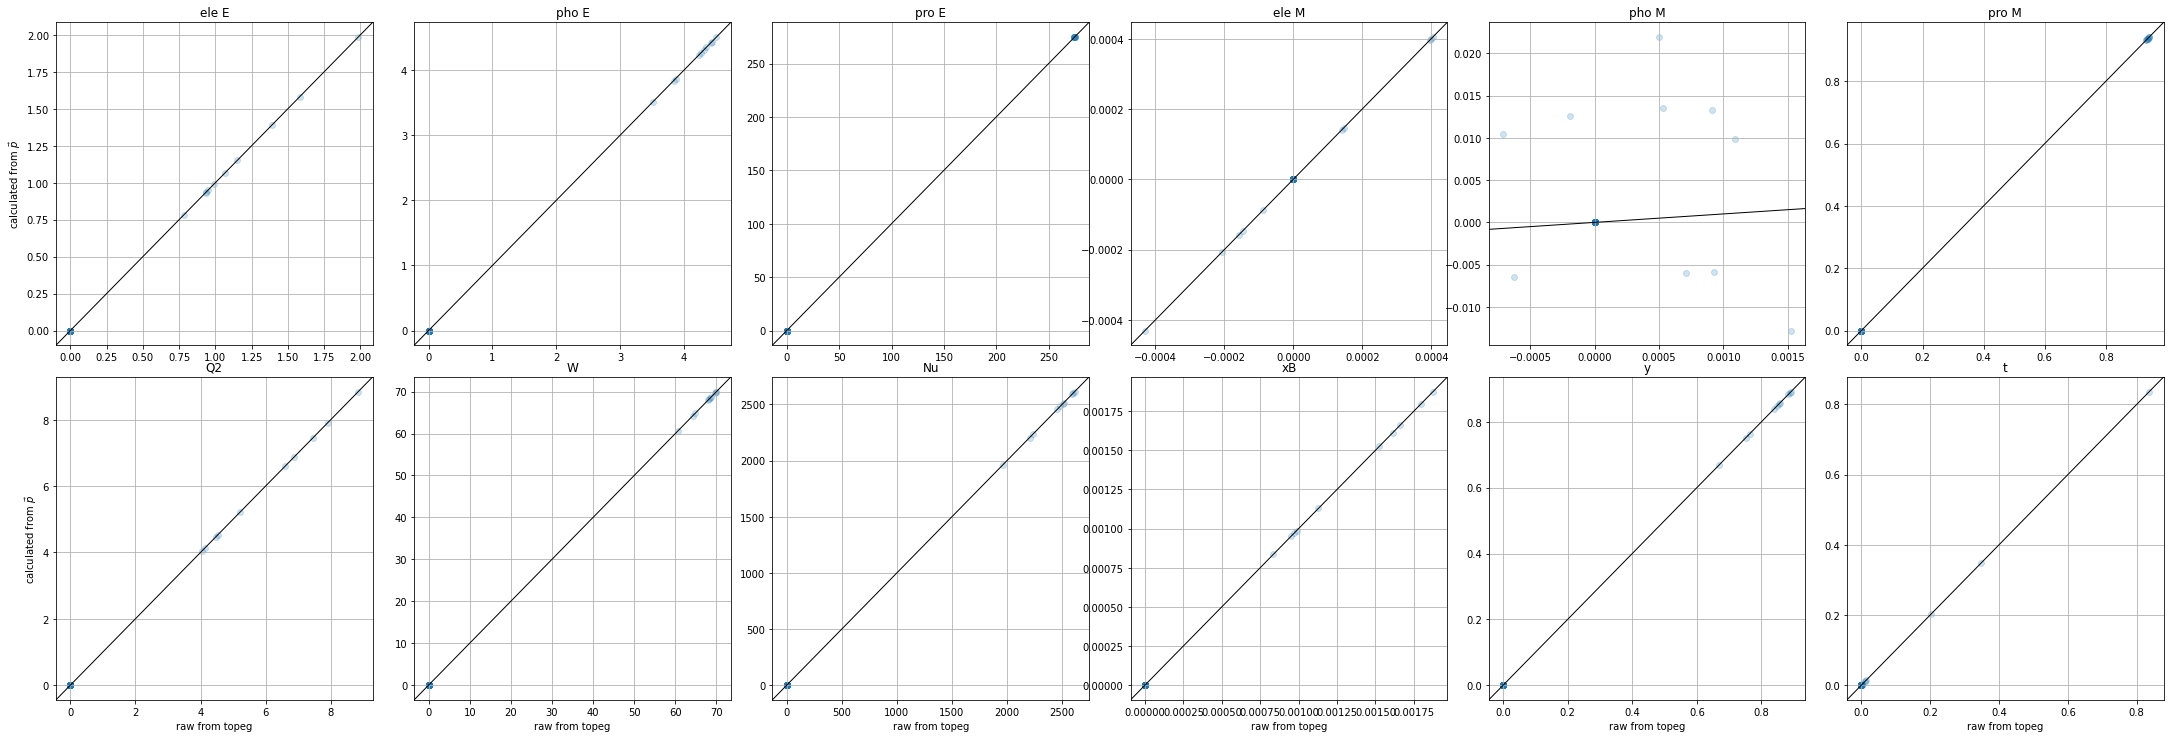

In [ ]:
f, axs = plt.subplots(2,6, figsize=(30,10)); f.tight_layout()
for ax in axs[:, 0]:  ax.set_ylabel(r"calculated from $\vec{p}$")
for ax in axs[-1, :]: ax.set_xlabel("raw from topeg")
axs = axs.flatten()
for i, ax in enumerate(axs):
    ax.scatter(real[:,i], calc[:,i], alpha=0.2)#, bins=100, weights=np.ones_like(err)/len(err))
    ax.set_xlim(ax.get_xlim())
    ax.set_ylim(ax.get_ylim())
    ax.plot([-5000,5000],[-5000,5000],'k', linewidth=1)
    ax.set_title(f"{nn[i]}")
    # ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax.grid()

f.savefig("imgs/scatter_kintool.png", bbox_inches="tight")

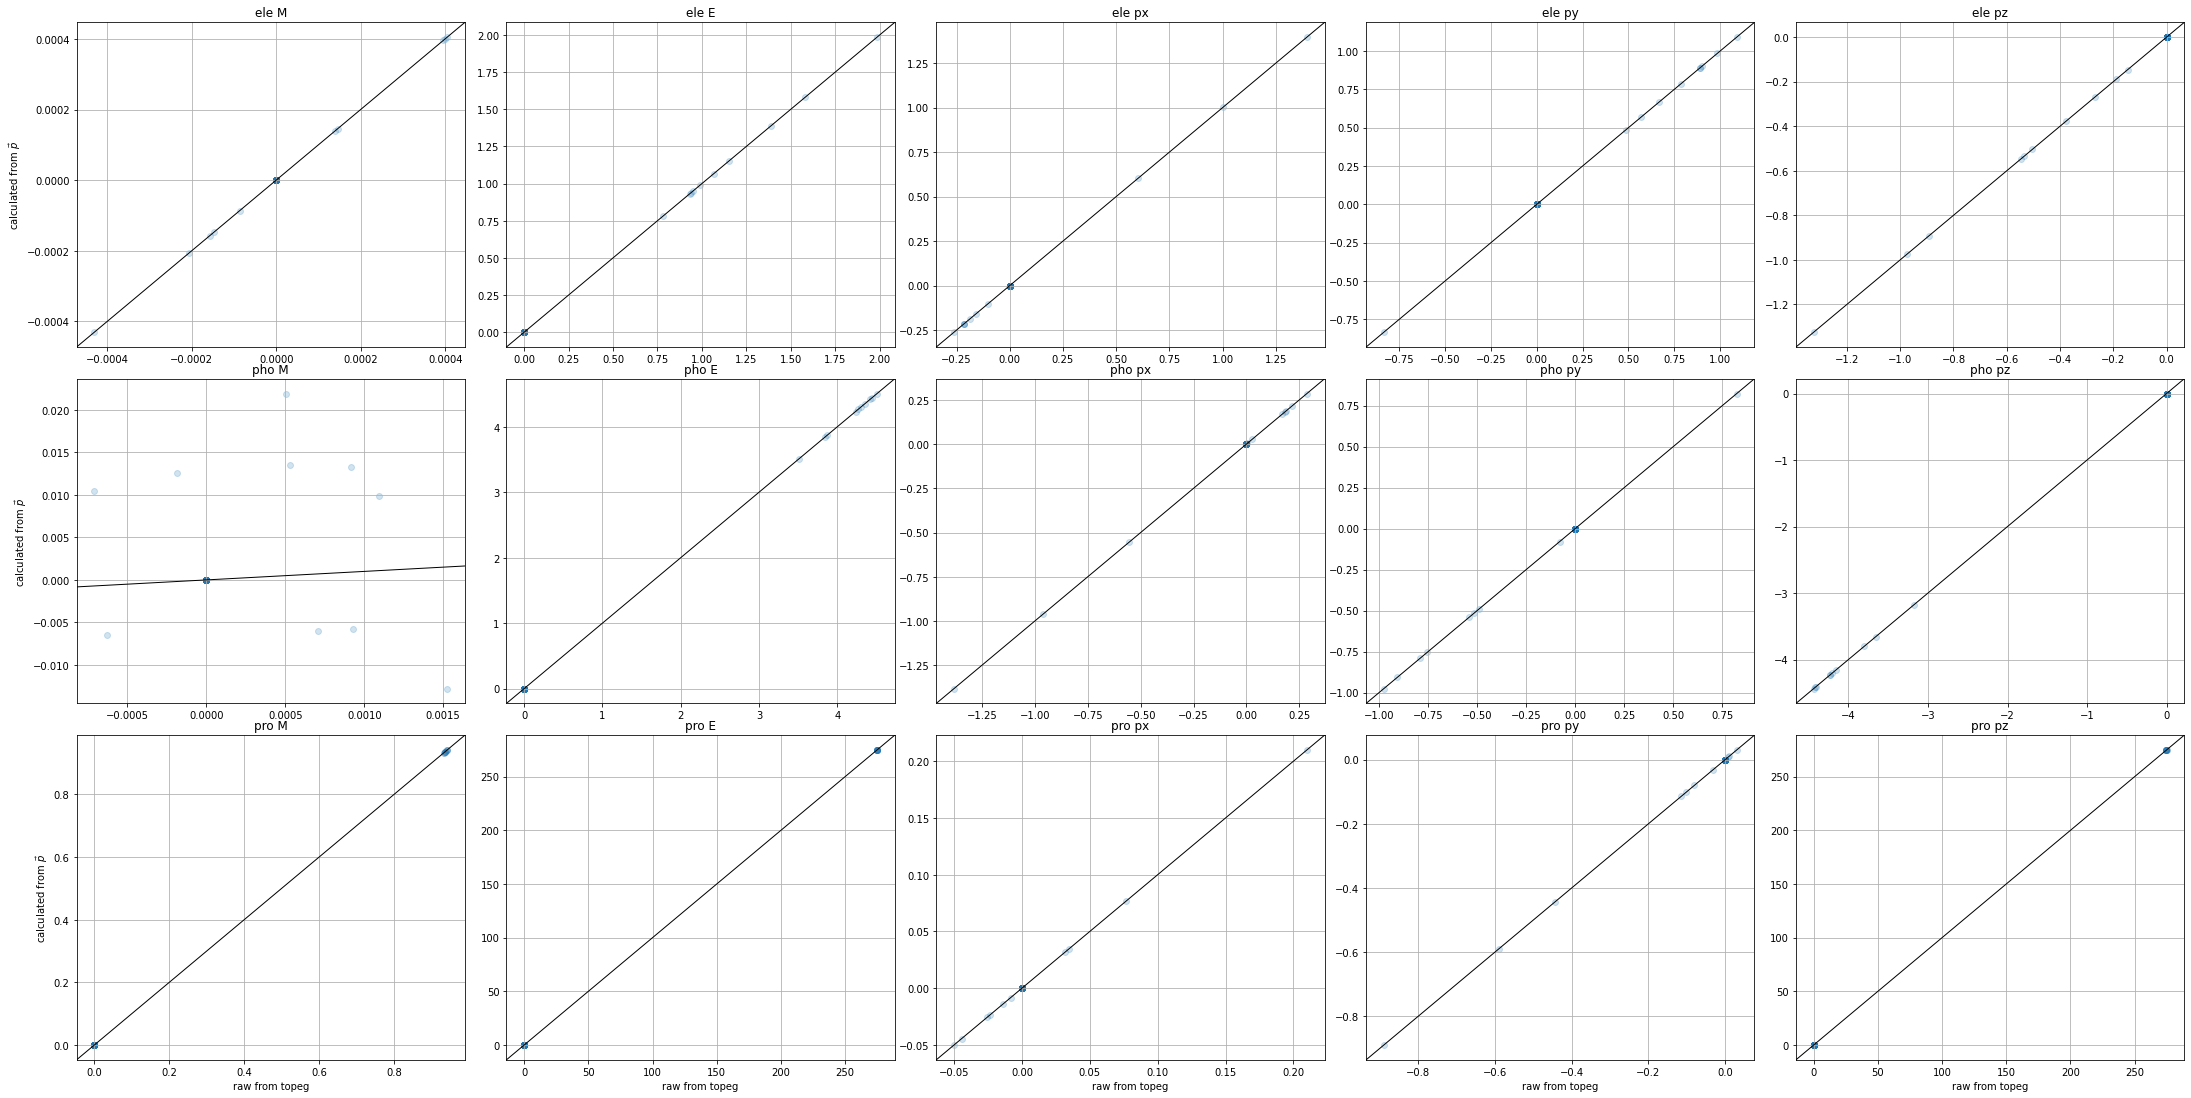

In [ ]:
f, axs = plt.subplots(3,5, figsize=(30,15)); f.tight_layout()
for ax in axs[:, 0]:  ax.set_ylabel(r"calculated from $\vec{p}$")
for ax in axs[-1, :]: ax.set_xlabel("raw from topeg")
axs = axs.flatten()
lv_names = [f"{p} {a}" for p in ["ele", "pho", "pro"] for a in ["M", "E", "px", "py", "pz"]]
real_lvs, calc_lvs = np.c_[real_eles, real_phos, real_pros], np.c_[calc_eles, calc_phos, calc_pros]
for i, ax in enumerate(axs):
    ax.scatter(real_lvs[:,i], calc_lvs[:,i], alpha=0.2)#, bins=100, weights=np.ones_like(err)/len(err))
    ax.set_xlim(ax.get_xlim())
    ax.set_ylim(ax.get_ylim())
    ax.plot([-5000,5000],[-5000,5000],'k', linewidth=1)
    ax.set_title(f"{lv_names[i]}")
    # ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax.grid()

f.savefig("imgs/lv_compare.png", bbox_inches="tight")

4.5957863836263715e-10 4.675144948614709e-09 9.372049796467411e-06
4.5957863836263715e-10 5.050070990962362e-08 9.372049796467411e-06


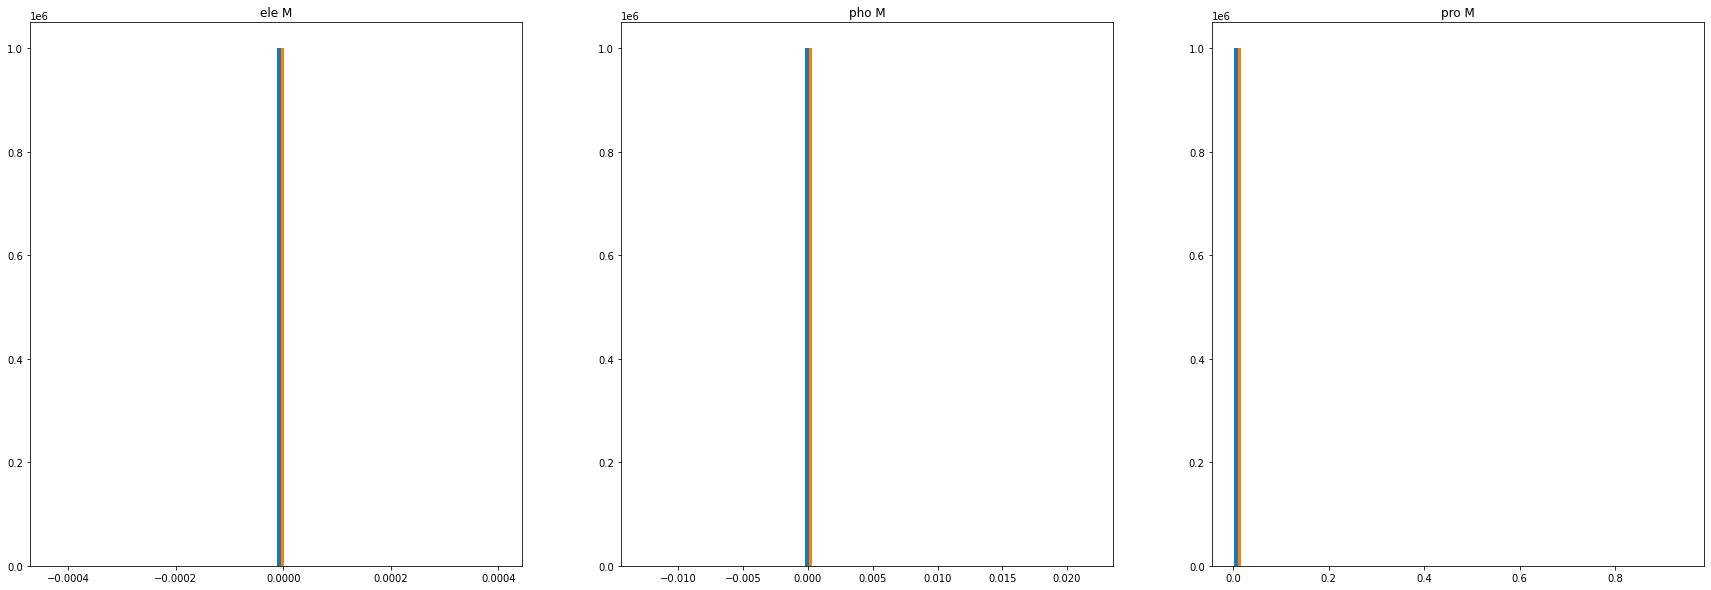

In [ ]:
f, axs = plt.subplots(1, 3, figsize=(30,10))
axs[0].hist([real_eles[:,0], calc_eles[:,0]], bins=50); axs[0].set_title("ele M")
axs[1].hist([real_phos[:,0], calc_phos[:,0]], bins=50); axs[1].set_title("pho M")
axs[2].hist([real_pros[:,0], calc_pros[:,0]], bins=50); axs[2].set_title("pro M")
print(np.mean(real_eles[:,0]), np.mean(real_phos[:,0]), np.mean(real_pros[:,0]))
print(np.mean(calc_eles[:,0]), np.mean(calc_phos[:,0]), np.mean(calc_pros[:,0]))

[[-2.33850107e-02 -1.14107460e-01  2.74497375e+02]
 [ 3.46228406e-02 -1.01982310e-01  2.74700287e+02]
 [-2.54761968e-02 -3.12115140e-02  2.74740387e+02]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]] [0.11647906 0.10769927 0.0402889  ... 0.         0.         0.        ] False


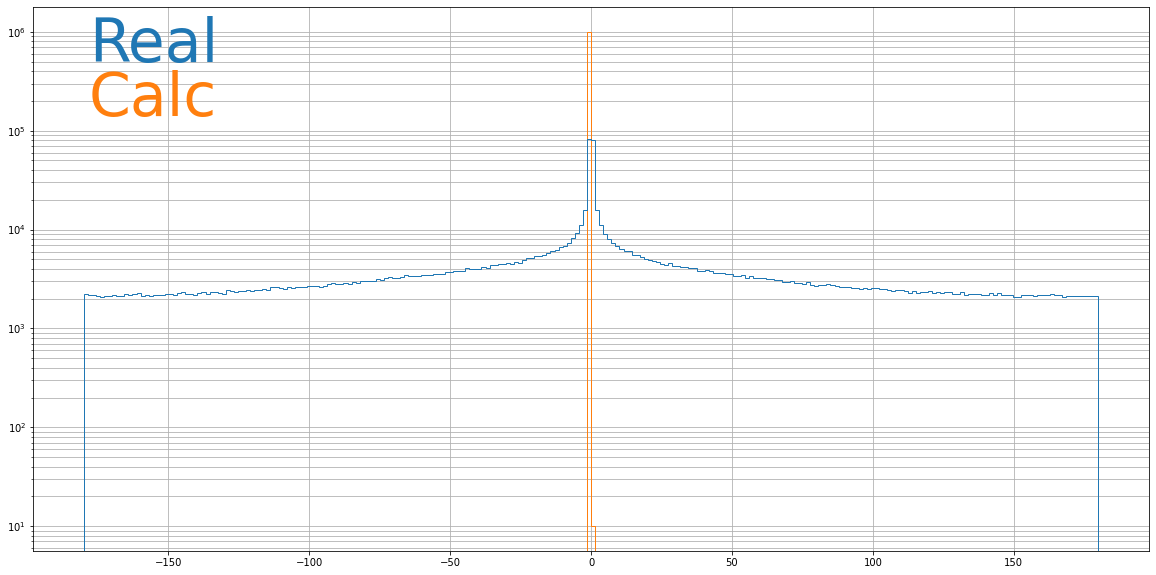

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(20,10))
ax.grid(which='both'); ax.set_yscale('log')

# phih = np.rad2deg(np.arctan2( real_pros[:, 3], real_pros[:, 2] ))
phih = np.rad2deg(np.arctan2( np.sqrt(np.sum(real_pros[:, 2:4]**2, axis=1)), real_pros[:, 4] ))

ax.hist([data[:,6] -360 * ( data[:,6] > 180), phih], histtype="step", bins=250);

ax.text(0.05, 0.90, "Real", transform=ax.transAxes, color="C0", fontsize=60)
ax.text(0.05, 0.80, "Calc", transform=ax.transAxes, color="C1", fontsize=60)


p = real_pros[:, 2:]
pT = np.sqrt(np.sum(p[:, :2]**2, axis=1))
phi = np.rad2deg(np.arctan2( pT, p[:, 2] ))
print(p, pT, np.any(phi > 10))

In [ ]:
def mpl_labels(ax, x, y, lab, title, fontsize=20):
    ax.set_xlabel(x, fontsize=fontsize)
    if lab == "MCEG": ax.set_ylabel(y, fontsize=fontsize)
    ax.set_title(lab+" "+title, fontsize=fontsize)
    ax.grid()

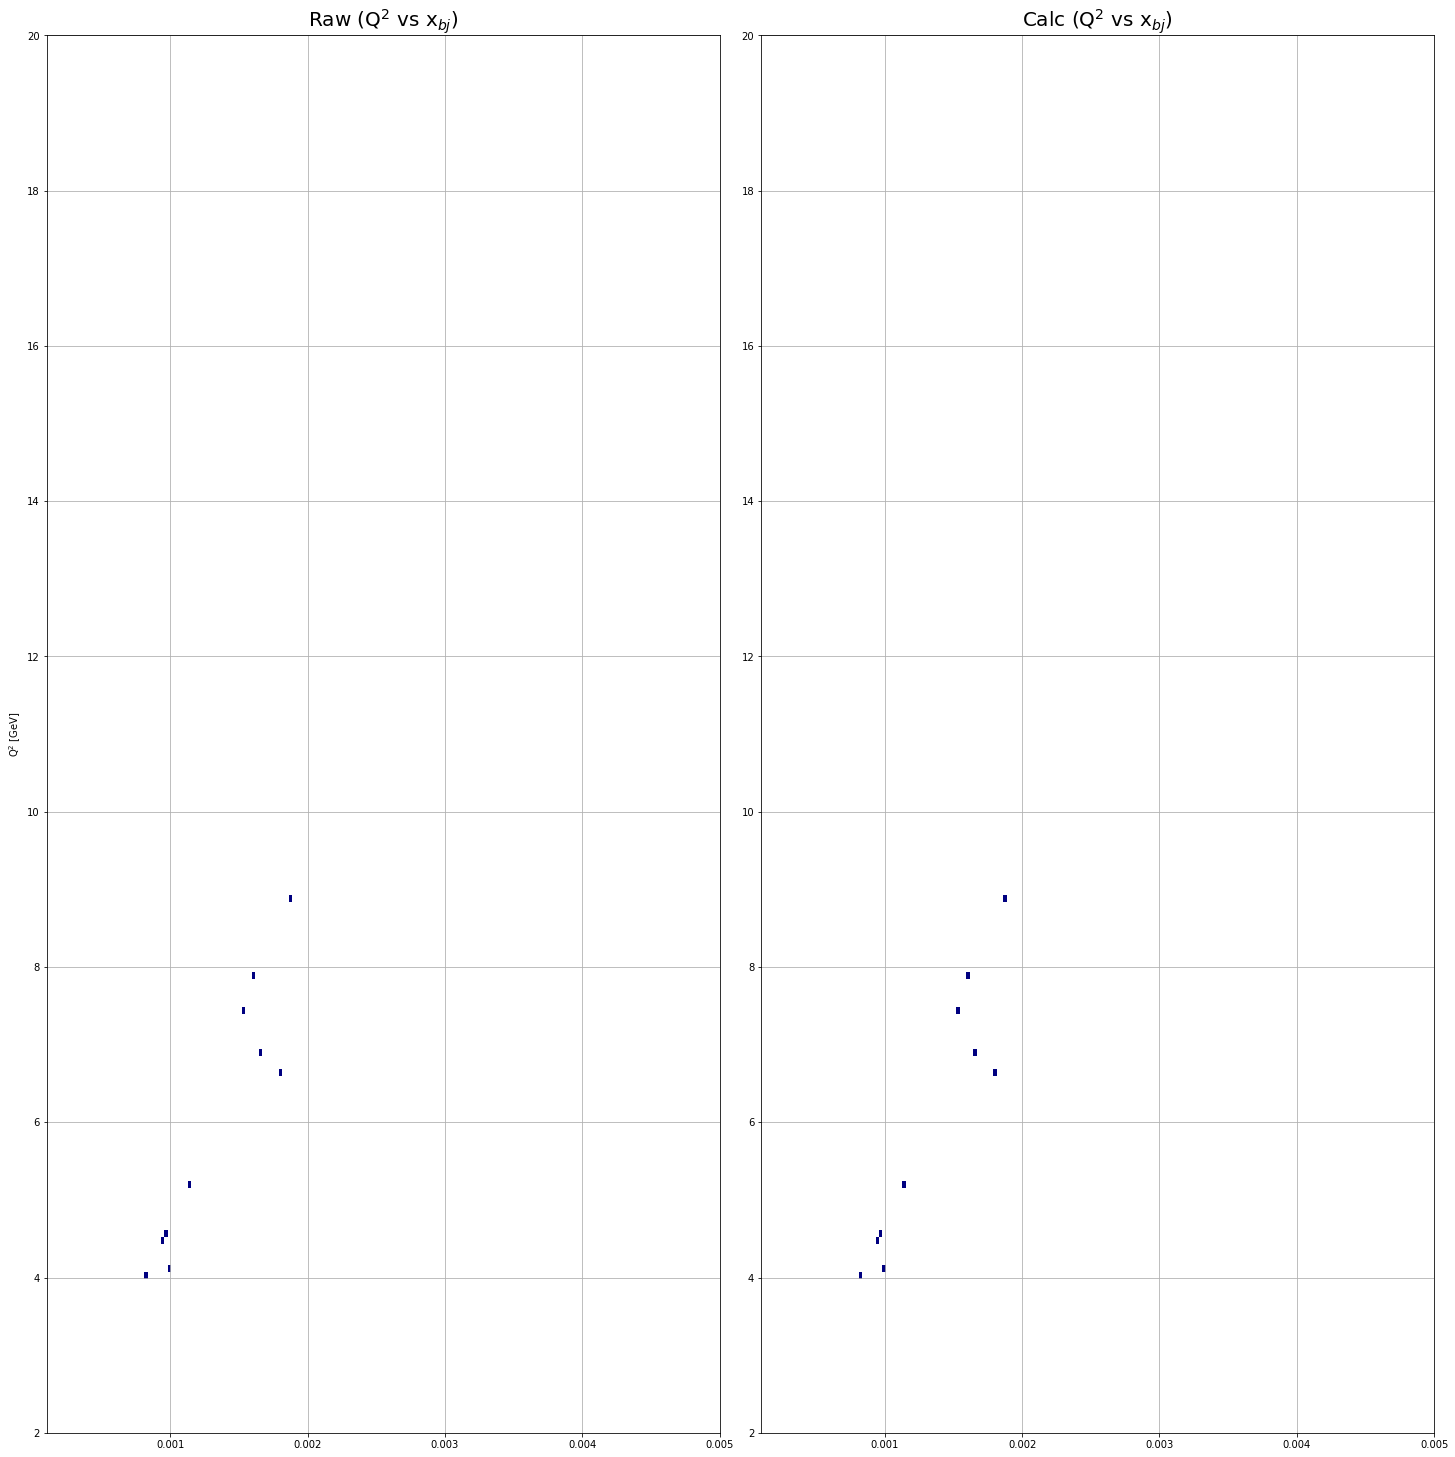

In [ ]:
f, axs = plt.subplots(1,2, figsize=(20,20)); f.tight_layout()
vmin, vmax = 1, 10000
xyrange, bins = [[0.0001, 0.005],[2, 20]], 200#(500,500)
for ax, hh, lab in zip(axs.flatten(), [real, calc], ["Raw", "Calc"]):
# for ax, hh, lab in zip(axs[0,:].flatten(), [real, calc], ["Raw", "Calc"]):
    ax.hist2d(hh[:,9], hh[:,6], bins=bins, range=xyrange, cmap=mpl.cm.jet, norm=mpl.colors.LogNorm(vmin=vmin,vmax=vmax))
    mpl_labels(ax, "", r"Q$^{2}$ [GeV]", lab, r"(Q$^{2}$ vs x$_{bj})$")
    # mpl_labels(ax, r"x$_{bj}$", r"Q$^{2}$ [GeV]", lab, r"(Q$^{2}$ vs x$_{bj}$)")
    if lab == "Raw": ax.set_ylabel(r"Q$^{2}$ [GeV]")

# vmin, vmax = 1, 1000
# xyrange, bins = [[0.0006, 0.002],[3, 8]], 100#(500,500)
# for ax, hh, lab in zip(axs[1,:].flatten(), [real, calc], ["Raw", "Calc"]):
#     ax.hist2d(hh[:,9], hh[:,6], bins=bins, range=xyrange, cmap=mpl.cm.jet, norm=mpl.colors.LogNorm(vmin=vmin,vmax=vmax))
#     # mpl_labels(ax, r"x$_{bj}$", r"Q$^{2}$ [GeV]", lab, r"(Q$^{2}$ vs x$_{bj}$)")
#     ax.set_xlabel(r"x$_{bj}$")
#     if lab == "Raw": ax.set_ylabel(r"Q$^{2}$ [GeV]")
#     ax.grid()

In [ ]:
# px py pz
# pT, ptheta, pz
# |p|, theta, phi